In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd
import dask.dataframe as dd
import warnings
import glob
import matplotlib.transforms as mt
plt.rcParams.update({'font.size': 16})

In [2]:
df_sdo = dd.read_parquet("/mnt/data2/SDO/AIA/dask_parquet", columns=['NSPIKES','WAVELNTH','GAEZ_OBS','GAEX_OBS','GAEY_OBS','EXPTIME','QUALITY','DATAMEAN'])

In [3]:
year_start = 2018; year_end = 2019
month_start = 1; month_end = 12
day_start = 1; day_end = 30
start_d = "{}-{}-{}".format(year_start,str(month_start).zfill(2),str(day_start).zfill(2)); 
end_d = "{}-{}-{}".format(year_end,str(month_end).zfill(2),str(day_end).zfill(2)) 
cadence = '{}min'.format(1) #change to 15 minutes
start_d, end_d

df_sdo = df_sdo.loc[start_d:end_d]

In [4]:
df_sdo.head()

,NSPIKES,WAVELNTH,GAEZ_OBS,GAEX_OBS,GAEY_OBS,EXPTIME,QUALITY,DATAMEAN
T_OBS,,,,,,,,
2018-01-01 00:00:00.570000+00:00,11907,94,-11192110.34,39703881.30,-8758104.20,2.900838,0x00000000,1.0772
2018-01-01 00:00:02.070000+00:00,20566,335,-11195343.63,39703695.11,-8754820.17,2.900777,0x00000000,1.0101
2018-01-01 00:00:05.840000+00:00,4830,193,-11203467.03,39703225.20,-8746568.22,2.000079,0x00000000,127.0011
2018-01-01 00:00:06.580000+00:00,21027,304,-11205056.12,39703132.91,-8744953.80,2.902053,0x00000000,4.7909
2018-01-01 00:00:08.070000+00:00,13184,131,-11208272.04,39702945.80,-8741686.46,2.901282,0x00000000,5.0944


In [5]:
df_sdo.tail()

,NSPIKES,WAVELNTH,GAEZ_OBS,GAEX_OBS,GAEY_OBS,EXPTIME,QUALITY,DATAMEAN
T_OBS,,,,,,,,
2019-12-30 23:59:53.840000+00:00,2255,193,-13720294.49,38313552.38,-11051168.23,2.000041,0x00000000,91.5016
2019-12-30 23:59:54.580000+00:00,7907,304,-13721779.54,38313513.95,-11049457.46,2.902022,0x00000000,4.1900
2019-12-30 23:59:56.070000+00:00,6820,131,-13724785.71,38313435.77,-11045994.20,2.901339,0x00000000,4.5028
2019-12-30 23:59:58.350000+00:00,1732,171,-13729366.53,38313315.67,-11040716.49,2.000135,0x00000000,163.8533
2019-12-30 23:59:59.080000+00:00,4067,211,-13730843.21,38313276.71,-11039015.06,2.900785,0x00000000,25.2913


In [ ]:
quality = df_sdo['QUALITY'].value_counts().compute()

<AxesSubplot:>

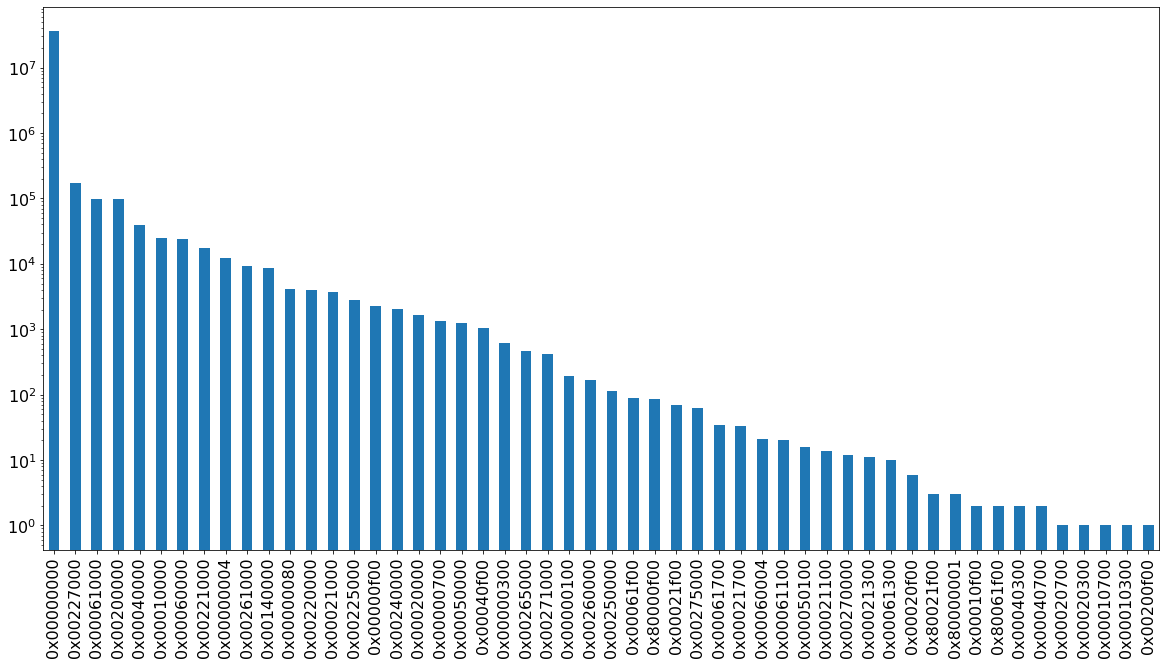

In [58]:
fig = plt.figure(figsize=(20, 10))
quality.plot(kind='bar', logy=True, fontsize=16)

In [182]:
# SDO
df_sdo = df_sdo.loc[(df_sdo['QUALITY'] == '0x00000000') & (df_sdo['EXPTIME'] < 6) & (df_sdo['EXPTIME'] > 0.5) & (df_sdo['WAVELNTH'] == 304)].compute()
df_sdo['NSPIKES_EXP'] = df_sdo['NSPIKES'] / df_sdo['EXPTIME']

In [183]:
df_sdo.head()

,NSPIKES,WAVELNTH,GAEZ_OBS,GAEX_OBS,GAEY_OBS,EXPTIME,QUALITY,DATAMEAN,NSPIKES_EXP
T_OBS,,,,,,,,,
2018-01-01 00:00:06.580000+00:00,21027,304,-11205056.12,39703132.91,-8744953.80,2.902053,0x00000000,4.7909,7245.560298
2018-01-01 00:00:18.580000+00:00,20526,304,-11230908.35,39701615.25,-8718681.40,2.902054,0x00000000,4.7993,7072.921455
2018-01-01 00:00:30.580000+00:00,20924,304,-11256758.55,39700066.79,-8692395.64,2.902054,0x00000000,4.7953,7210.065698
2018-01-01 00:00:42.580000+00:00,20474,304,-11282587.80,39698488.70,-8666115.78,2.902055,0x00000000,4.7982,7055.000681
2018-01-01 00:00:54.590000+00:00,20896,304,-11308432.42,39696878.73,-8639804.84,2.902053,0x00000000,4.7945,7200.419841


In [270]:
y, x = np.histogram(np.log10(df_sdo['NSPIKES_EXP'].to_numpy()), bins=200)
x=(x[1:]+x[:-1])/2
len(y), len(x)

(200, 200)

In [276]:
from scipy.optimize import curve_fit

def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)


expected=(2.6,.2, 50000, 4, 0.8, 70000)
params,cov=curve_fit(bimodal, x, y,expected)

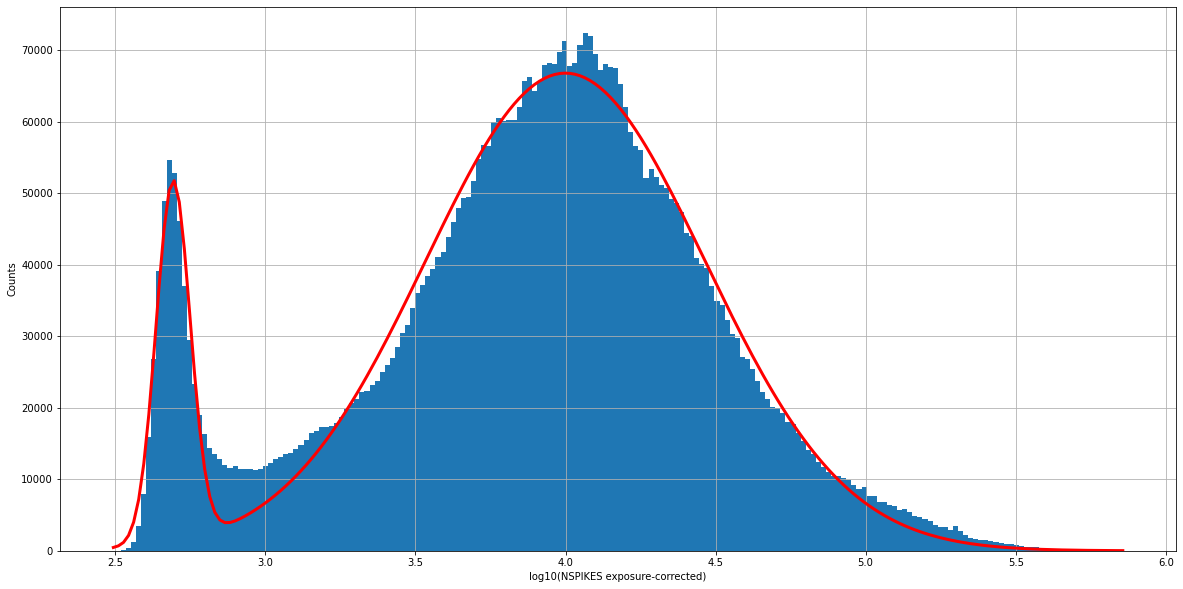

In [277]:
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.hist(np.log10(df_sdo['NSPIKES_EXP']),bins=200);

sigma=np.sqrt(np.diag(cov))
plt.plot(x, bimodal(x,*params), color='red', lw=3, label='model')

# ax.axvline(1.5, color='gray')
ax.set_xlabel('log10(NSPIKES exposure-corrected)')
ax.set_ylabel('Counts')
plt.grid()

In [206]:
nspikes_daily_mean = df_sdo['NSPIKES_EXP'].resample('1D').mean()
nspikes_daily_min = df_sdo['NSPIKES_EXP'].resample('1D').min()

In [ ]:
threshold = 1500
low_v_idx = df_sdo[df_sdo['NSPIKES_EXP'] < threshold].index


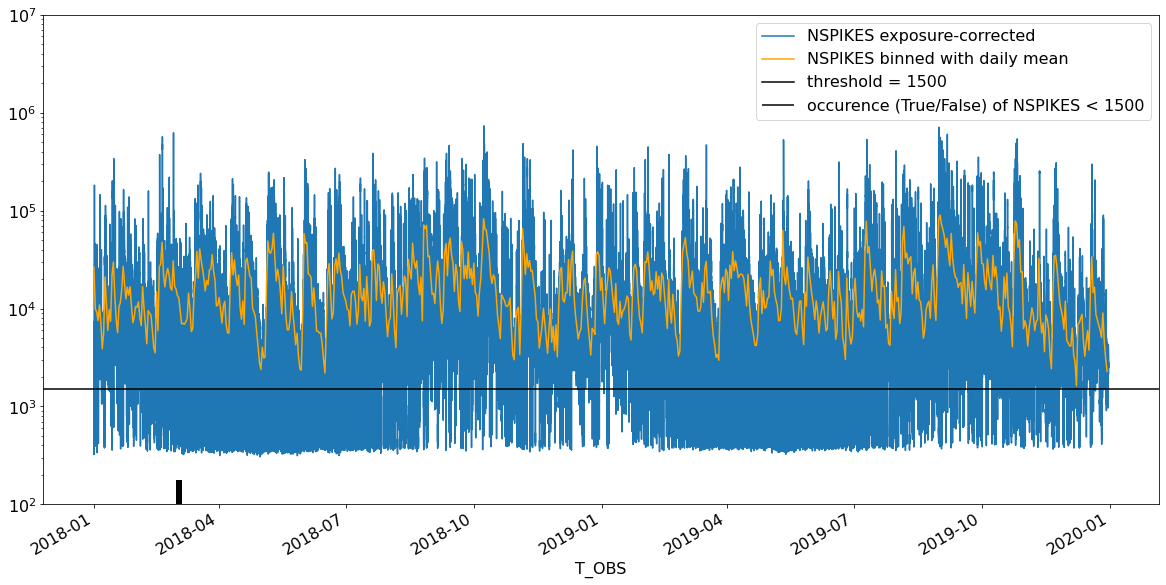

In [259]:
%matplotlib inline
plt.rcParams.update({'font.size': 16})


fig, ax = plt.subplots(1, 1, figsize=(20,10))
df_sdo['NSPIKES_EXP'].plot(logy=True, ax=ax, label='NSPIKES exposure-corrected')
nspikes_daily_mean.plot(logy=True, color='orange', ax=ax, label='NSPIKES binned with daily mean')

trans = mt.blended_transform_factory(ax.transData, ax.transAxes)
ax.vlines(low_v_idx, ymin=0, ymax=0.05, color='black', transform=trans, label=f'occurence (True/False) of NSPIKES < {threshold}')
ax.axhline(y = threshold, color='black', label=f'threshold = {threshold}')

ax.set_ylim([1e2, 1e7])
plt.legend(loc = 'upper right')

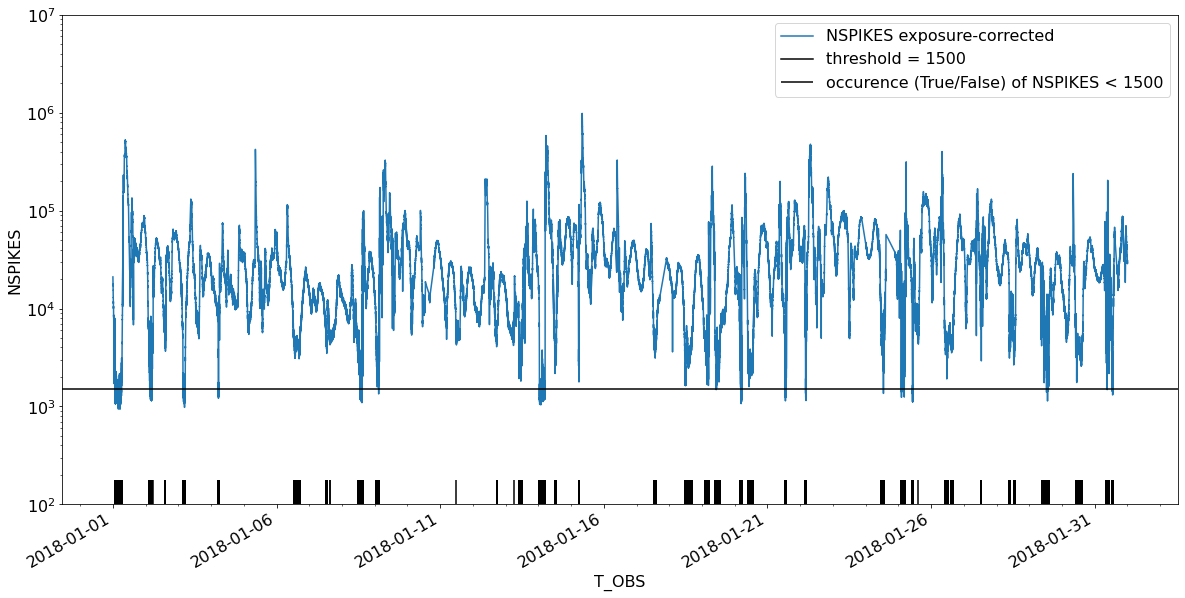

In [252]:
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams.update({'font.size': 16})

threshold = 1500
df_sdo_month = df.loc['2018-01-01':'2018-01-31']
low_v_idx = df_sdo_month[df_sdo_month['NSPIKES_EXP'] < threshold].index

fig, ax = plt.subplots(1, 1, figsize=(20,10))
df_sdo_month['NSPIKES'].plot(logy=True, ax=ax, label='NSPIKES exposure-corrected')
trans = mt.blended_transform_factory(ax.transData, ax.transAxes)
ax.vlines(low_v_idx, ymin=0, ymax=0.05, color='black', transform=trans, label=f'occurence (True/False) of NSPIKES < {threshold}')
ax.axhline(y = threshold, color='black', label=f'threshold = {threshold}')
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.set_ylabel('NSPIKES')
ax.set_ylim([1e2, 1e7])
plt.legend(loc = 'upper right')

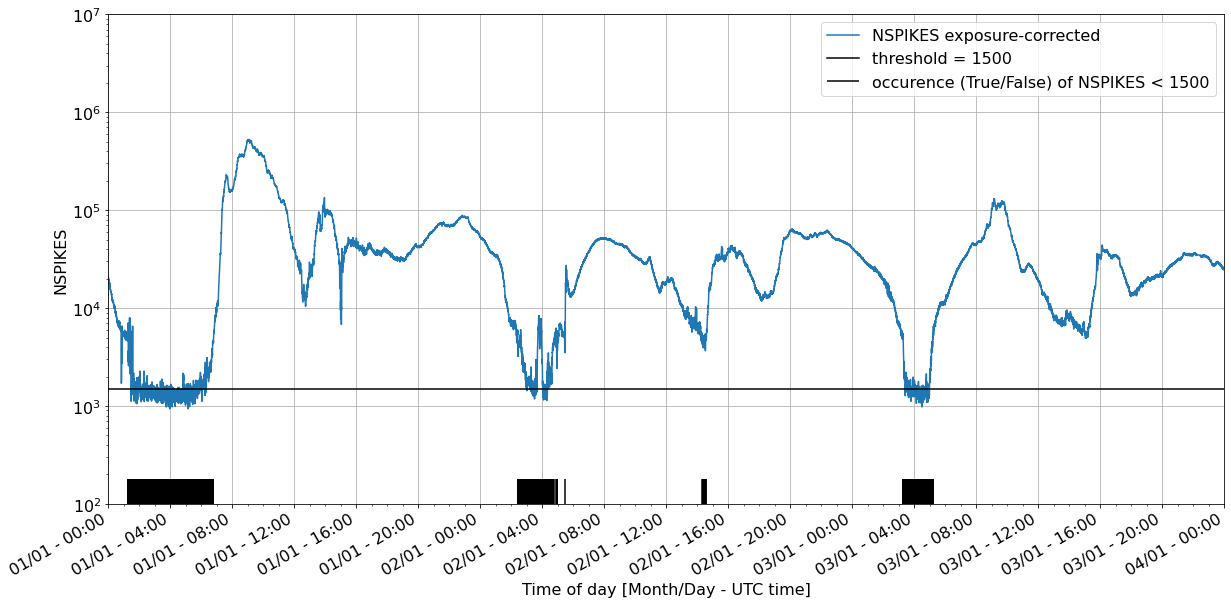

In [256]:
%matplotlib inline
plt.rcParams.update({'font.size': 16})

threshold = 1500
df_sdo_month = df.loc['2018-01-01':'2018-01-04']
low_v_idx = df_sdo_month[df_sdo_month['NSPIKES_EXP'] < threshold].index

fig, ax = plt.subplots(1, 1, figsize=(20,10))
df_sdo_month['NSPIKES'].plot(logy=True, ax=ax, label='NSPIKES exposure-corrected')
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m - %H:%M'))
trans = mt.blended_transform_factory(ax.transData, ax.transAxes)
ax.vlines(low_v_idx, ymin=0, ymax=0.05, color='black', transform=trans, label=f'occurence (True/False) of NSPIKES < {threshold}')
ax.axhline(y = threshold, color='black', label=f'threshold = {threshold}')
ax.set_ylabel('NSPIKES')
ax.set_xlabel('Time of day [Month/Day - UTC time]')
ax.set_xlim(['2018-01-01 00:00:00', '2018-01-04 00:00:00'])
ax.set_ylim([1e2, 1e7])
plt.legend(loc = 'upper right')
plt.grid()

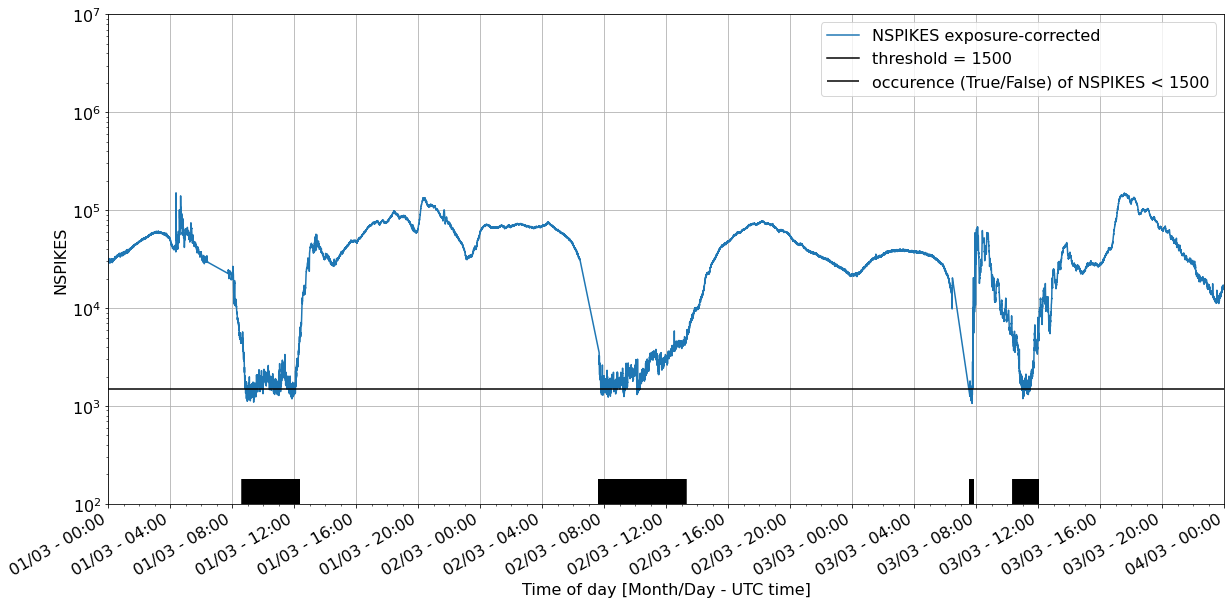

In [258]:
%matplotlib inline
plt.rcParams.update({'font.size': 16})
import matplotlib.dates as mdates
threshold = 1500
df_sdo_month = df.loc['2018-03-01':'2018-03-04']
low_v_idx = df_sdo_month[df_sdo_month['NSPIKES_EXP'] < threshold].index

fig, ax = plt.subplots(1, 1, figsize=(20,10))
df_sdo_month['NSPIKES'].plot(logy=True, ax=ax, label='NSPIKES exposure-corrected')
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m - %H:%M'))
trans = mt.blended_transform_factory(ax.transData, ax.transAxes)
ax.vlines(low_v_idx, ymin=0, ymax=0.05, color='black', transform=trans, label=f'occurence (True/False) of NSPIKES < {threshold}')
ax.axhline(y = threshold, color='black', label=f'threshold = {threshold}')
ax.set_ylabel('NSPIKES')
ax.set_xlabel('Time of day [Month/Day - UTC time]')
ax.set_xlim(['2018-03-01 00:00:00', '2018-03-04 00:00:00'])
ax.set_ylim([1e2, 1e7])
plt.legend(loc = 'upper right')
plt.grid()